This sections tokenizes lowercased text with NLTK and computes word frequencies.

In [2]:
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
import matplotlib.pyplot as plt

def freq_corpus(corpus):
    with open(corpus, 'r') as f:
        data = WordPunctTokenizer().tokenize(f.read().lower())
        data = data[1:] # remove first unicode byte
    return (Counter(data), len(data))

filenames = [
    '../data/'+x+'.txt' for x in
    ['Junglebook', 'King James Bible', 'SETIMES Turkish', 'SETIMES Bulgarian']
]
data = [freq_corpus(corpus) for corpus in filenames]

This sections declares the drawing method for both the relative frequencies and the log-log scale.

In [3]:
def plot_corpora(filename, data, most_common=None, normalize=False, loglog=False):
    xfreqs = [
        sorted([x[1]/(corpus[1] if normalize else 1) for x in corpus[0].most_common(most_common)], reverse=True)
        for corpus in data
    ]
    maxfreqs = [max(corpus[0].values()) for corpus in data]
    
    plt.figure(figsize=(9,4))
    plotfunc = plt.loglog if loglog else plt.plot 
    for (filename, xfreq, maxfreq) in zip(filenames, xfreqs, maxfreqs):
        label = f'{filename.lstrip("../data/").rstrip(".txt")} ({maxfreq//1000}k)'
        plotfunc(xfreq, label=label, alpha=0.8)
        
    plt.legend()
    plt.title(
        f'{most_common if most_common else "All"} most common words' +
        (
            ' on the log-log scale' if loglog else 
            ' with relative frequency' if normalize else
            ' on the unit-scale'
        )
    )
    plt.xlabel('Words (log)' if loglog else 'Words (units)')
    plt.ylabel(
        'Frequency (log)' if loglog else
        'Relative freqency' if normalize else
        'Frequency'
    )
    plt.show()

To pass the assignment, the following graph is included. But since the corpora have different lengths, the absolute frequencies are not exactly comparable.

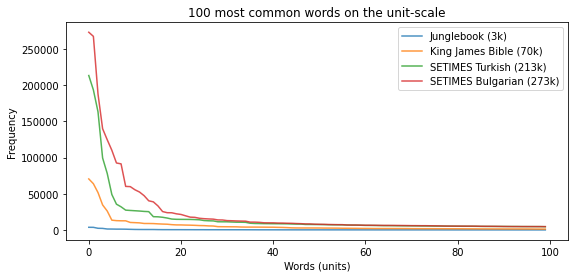

In [4]:
plot_corpora(filenames, data, most_common=100, loglog=False)

In the following graph, the word frequency counts are normalized with respect to the document length. Numbers in legend brackets is the number of occurences of the most frequent token.

We can see, that the English texts have higher mass in the first few tokens than other languages. This can be explained by presumably poor English morphology and low number of word-forms per lexeme, while in Turkish, there are more word-forms to which the mass needs to be distributed, resulting in the lowest curve.  

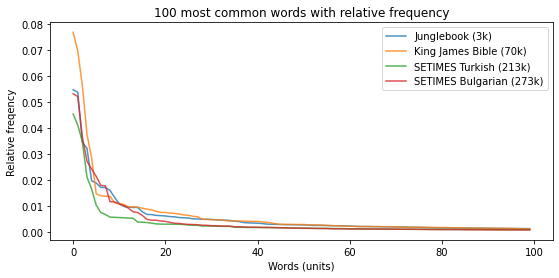

In [5]:
plot_corpora(filenames, data, most_common=100, normalize=True, loglog=False)

The following graph on the log-log scale seems to confirm Zipf's law. Even though it's not exactly a linear relationship, it is resembling one.

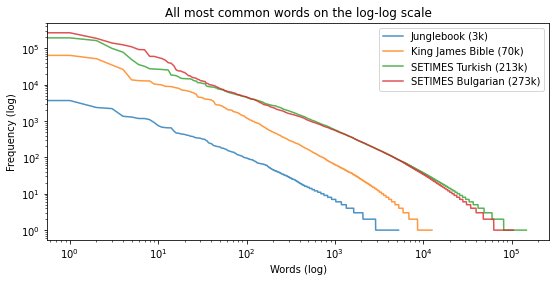

In [6]:
plot_corpora(filenames, data, most_common=None, normalize=False, loglog=True)